In [1]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

## Neural Network libraries
from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix

In [2]:
## Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# EXPLORATORY DATA ANALYSIS #

In [55]:
pd.DataFrame(df['DEATH_EVENT'].value_counts())

,DEATH_EVENT
0,203
1,96


[Text(0, 0, '203'), Text(0, 0, '96')]

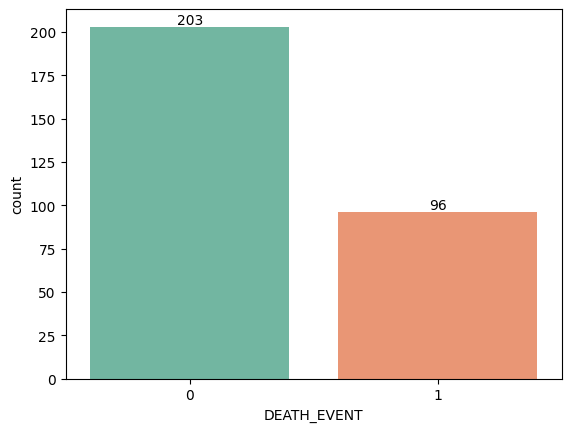

In [56]:
ax = sns.countplot(x= df["DEATH_EVENT"], palette='Set2')
ax.bar_label(ax.containers[0])

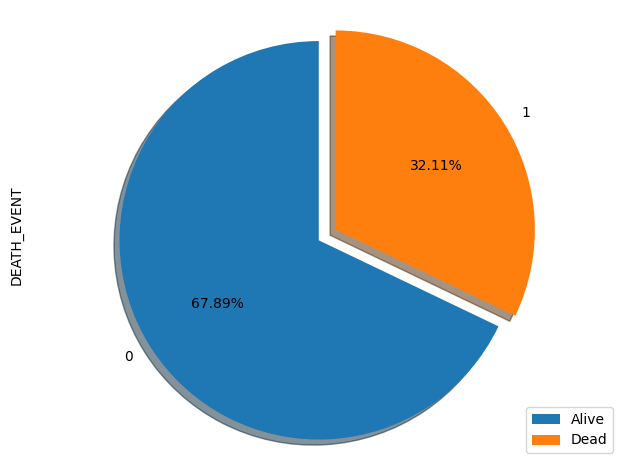

In [57]:
# Pie chart with DEATH_EVENT count
explode = (0, 0.1)
fig, ax = plt.subplots()
df.groupby(['DEATH_EVENT'])['DEATH_EVENT'].count().plot(kind = 'pie', y=df['DEATH_EVENT'], autopct = '%.2f%%', explode=explode, ax = ax, startangle=90,shadow=True)
plt.legend(['Alive','Dead'])
ax.axis('equal')  
plt.tight_layout()
plt.show()

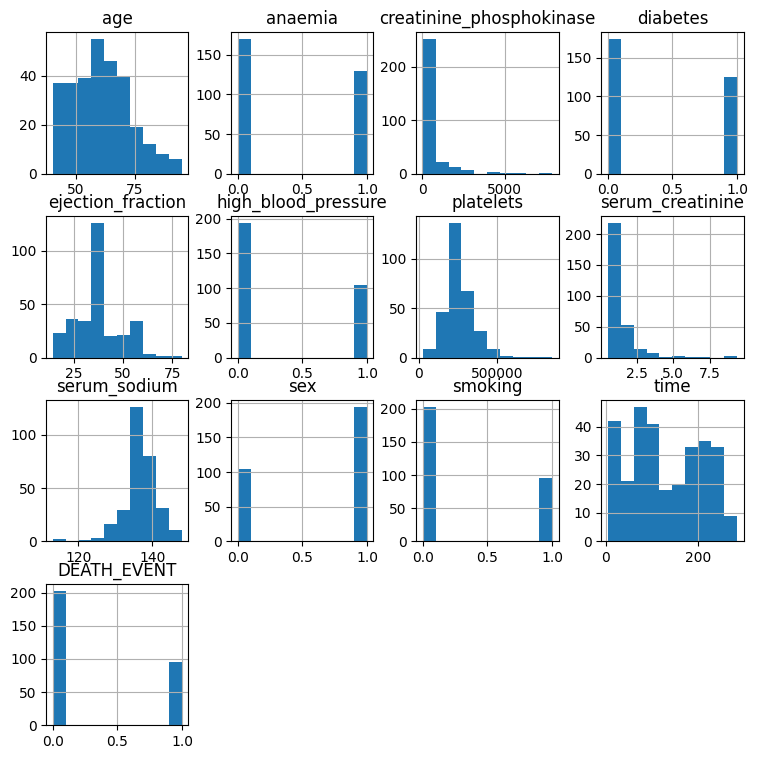

In [9]:
df.hist(bins= 10, figsize= (9,9))
plt.show()

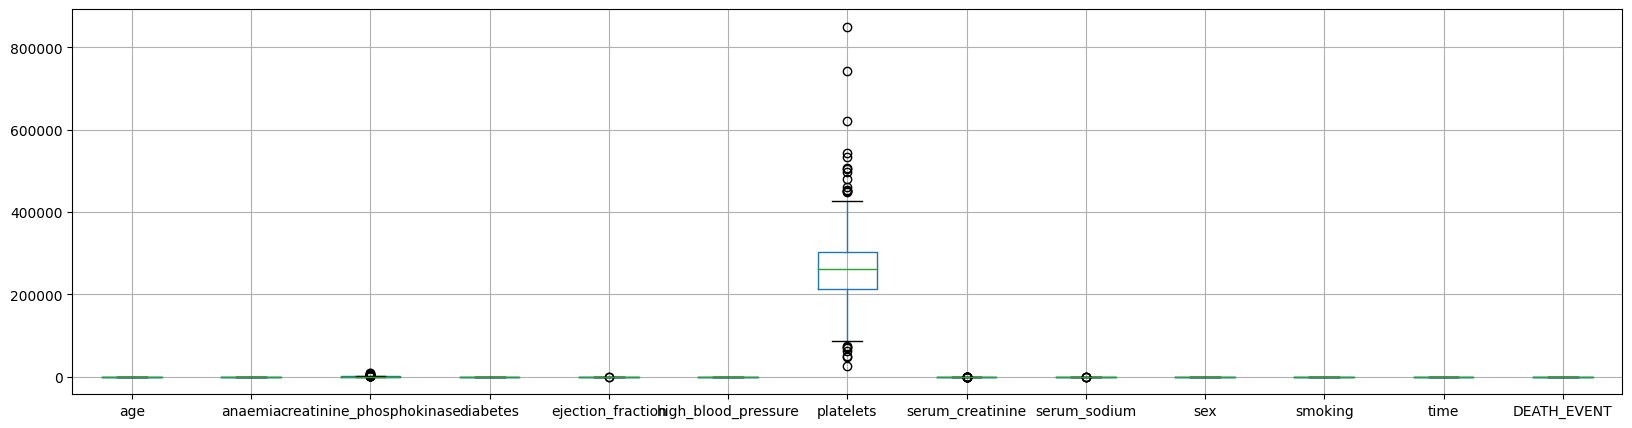

In [10]:
## Outliers
df.boxplot(figsize=(20,5))
plt.show()

In [11]:
## I'll try and replace the outliers of Platelets with the median
df['platelets'].median()


262000.0

In [12]:
max_threshold, min_threshold = df['platelets'].quantile([0.99, 0.01])
print("max:",max_threshold)
print("min:", min_threshold)

max: 544559.9999999986
min: 61780.0


In [58]:
outliers = ((df['platelets'] - df['platelets'].median()).abs()) > 3*df['platelets'].std()


In [14]:
df['platelets'][outliers] = np.nan
df['platelets'].fillna(df['platelets'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19044\67049578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['platelets'][outliers] = np.nan


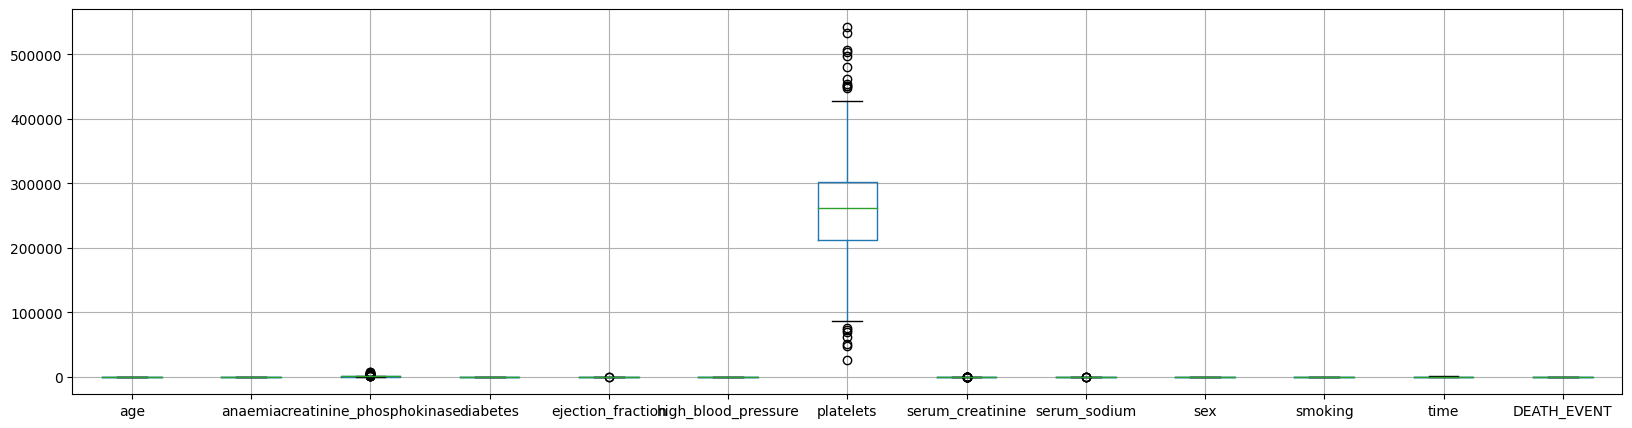

In [15]:
df.boxplot(figsize=(20,5))
plt.show()

In [16]:
df['platelets'].describe()

count       299.000000
mean     258575.420569
std       84793.316039
min       25100.000000
25%      212500.000000
50%      261000.000000
75%      302000.000000
max      543000.000000
Name: platelets, dtype: float64

In [17]:
# Correlation Matrix 
corr_mat = df.corr()
corr_mat

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.017394,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.030006,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.009908,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.068518,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.063806,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.069398,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.017394,-0.030006,0.009908,0.068518,0.063806,0.069398,1.000000,-0.038692,0.032897,-0.116275,-0.008887,-0.003658,-0.048290
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.038692,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.032897,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.116275,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


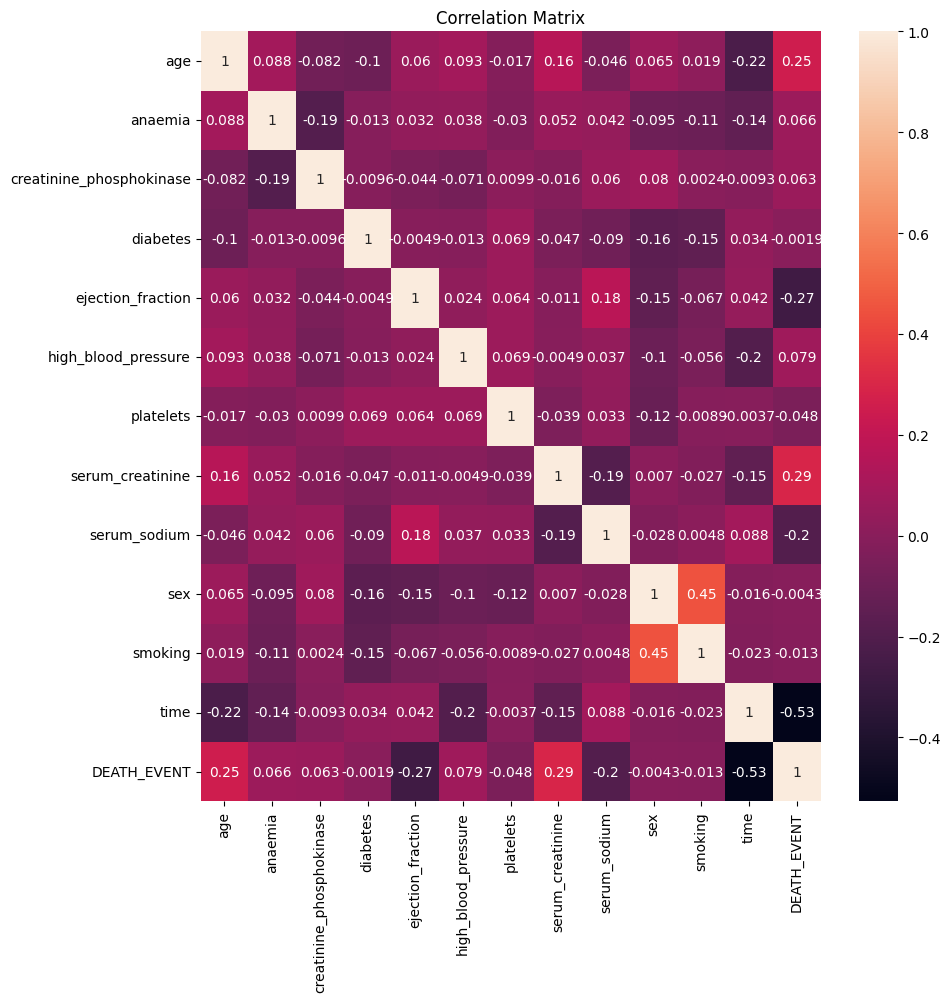

In [18]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True)
plt.title("Correlation Matrix")
plt.show()

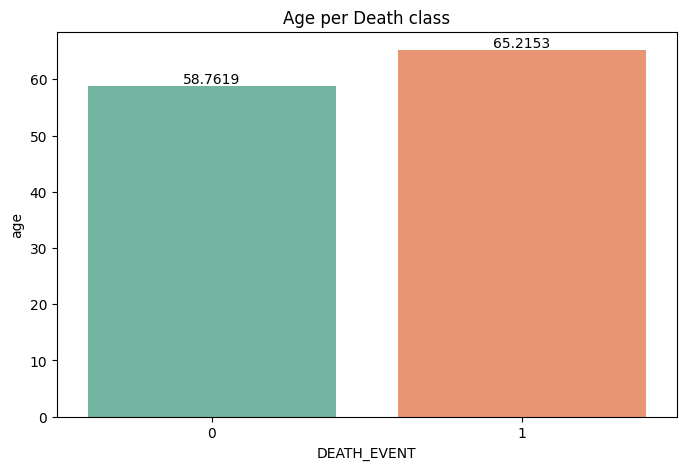

In [19]:
ax = plt.figure(figsize=(8,5))

ax = sns.barplot(x="DEATH_EVENT",y="age",data=df.groupby('DEATH_EVENT')['age'].mean('age').to_frame().reset_index(), palette='Set2')
ax.bar_label(ax.containers[0])
plt.title('Age per Death class')

plt.show()

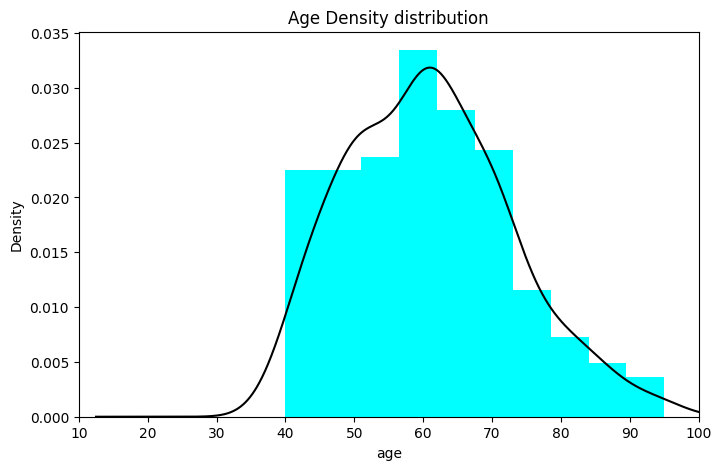

In [50]:
## Histogram of Age
fig, ax = plt.subplots(figsize=(8, 5))

plt.hist(df['age'], bins=10, density=True,stacked=False, color='cyan', alpha=1)
df["age"].plot(kind='density', color='black')
ax.set(xlabel='age')
plt.title('Age Density distribution')
plt.xlim(10,100)

plt.show()


Text(0.5, 1.0, 'Kernel Density Estimation')

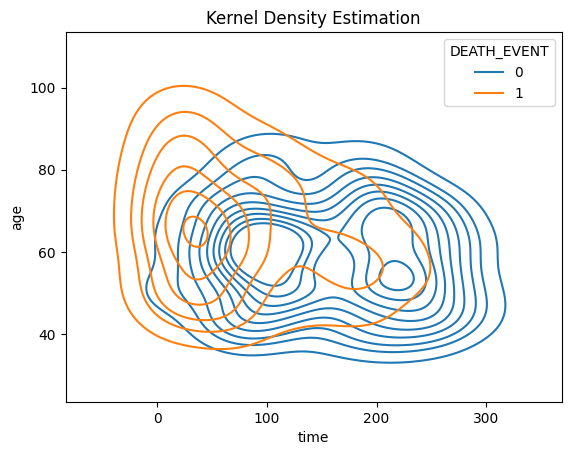

In [59]:
sns.kdeplot(data=df, x="time", y='age', hue = 'DEATH_EVENT')
plt.title('Kernel Density Estimation')


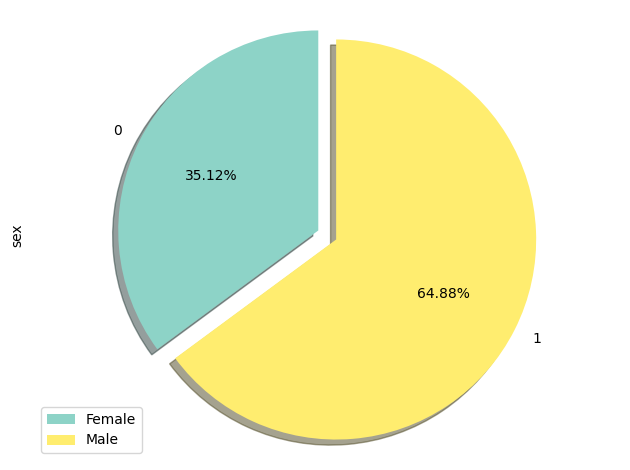

In [70]:
# Pie chart with sex count
explode = (0, 0.1)
fig, ax = plt.subplots()
df.groupby(['sex'])['sex'].count().plot(kind = 'pie', y=df['sex'], autopct = '%.2f%%', explode=explode, ax = ax, startangle=90,shadow=True, colormap='Set3')
plt.legend(['Female','Male'])
ax.axis('equal')  
plt.tight_layout()
plt.show()

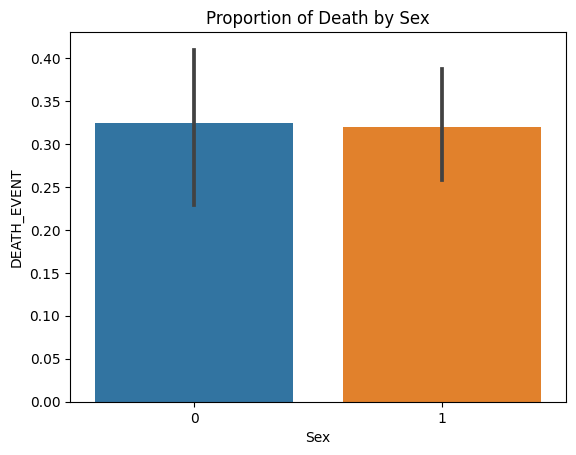

In [71]:
## Sex Survived
sns.barplot(x='sex', y='DEATH_EVENT', data=df)
plt.title('Proportion of Death by Sex')
plt.xlabel('Sex')
plt.show()


# ANN #

In [23]:
df.shape

(299, 13)

In [24]:
## split the data into independent and dependent variable
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [25]:
## Standarising 
col_names = list(X.columns)
s_scaler = StandardScaler()
X_norm= s_scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=col_names) 

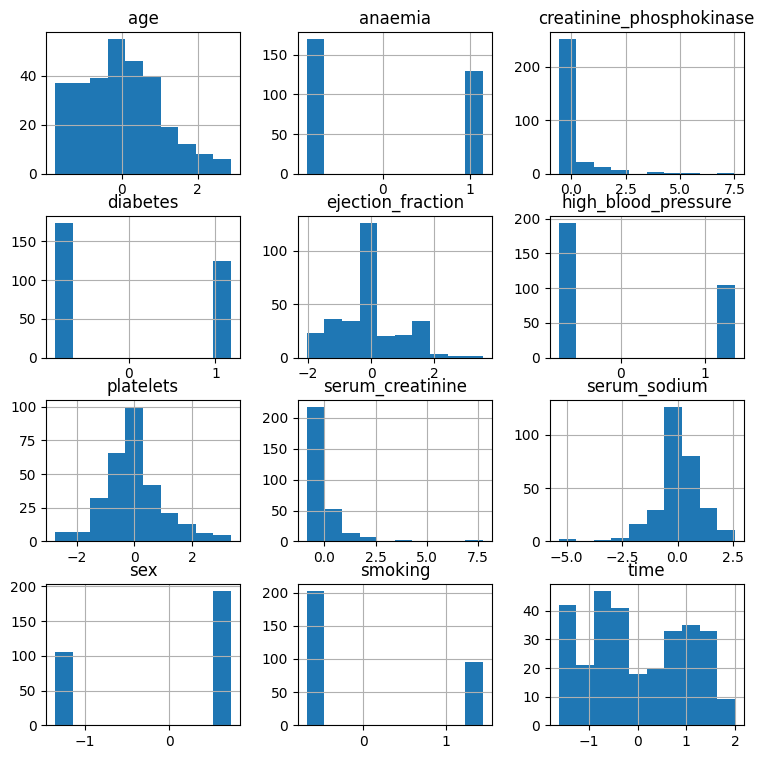

In [27]:
X_norm.hist(bins= 10, figsize= (9,9))
plt.show()

In [28]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=32)

In [29]:
## Standard Scaler

#scaler = StandardScaler()
#X_Train = scaler.fit_transform(X_train)
#X_Test = scaler.transform(X_test)

In [30]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True)

In [31]:
## Initialise the NN
model = Sequential()

## set up the layers
# input layer
model.add(Dense(units=15, kernel_initializer='uniform', activation='relu', input_dim=12)) 
# hidden layer
model.add(Dense(units=5, kernel_initializer='uniform', activation='relu')) 
# Dropout - to avoid overfitting (regularizator)
model.add(Dropout(0.2))
# Output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) 

## Compiling the ANN
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [80]:
history = model.fit(X_train, y_train, batch_size=15, epochs=90, callbacks=early_stopping, validation_split=0.20)  ## 20% of our training data to use as validation data

Epoch 1/90
13/13 [==============================] - 0s 10ms/step - loss: 0.3727 - accuracy: 0.8168 - val_loss: 0.3020 - val_accuracy: 0.8958
Epoch 2/90
13/13 [==============================] - 0s 4ms/step - loss: 0.3764 - accuracy: 0.8377 - val_loss: 0.3017 - val_accuracy: 0.8958
Epoch 3/90
13/13 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8377 - val_loss: 0.3029 - val_accuracy: 0.8958
Epoch 4/90
13/13 [==============================] - 0s 4ms/step - loss: 0.3806 - accuracy: 0.8272 - val_loss: 0.3025 - val_accuracy: 0.8958
Epoch 5/90
13/13 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.8272 - val_loss: 0.2999 - val_accuracy: 0.8958
Epoch 6/90
13/13 [==============================] - 0s 4ms/step - loss: 0.3683 - accuracy: 0.8272 - val_loss: 0.3002 - val_accuracy: 0.8958
Epoch 7/90
13/13 [==============================] - 0s 4ms/step - loss: 0.3630 - accuracy: 0.8482 - val_loss: 0.2998 - val_accuracy: 0.8958
Epoch 8/90
13/13 [=

In [54]:
## Make prediction
y_pred_ann = model.predict(X_test)
pd.DataFrame(y_pred_ann, columns=['Y_Pred']).head()

2/2 [==============================] - 0s 2ms/step


,Y_Pred
0,0.255858
1,0.074728
2,0.040759
3,0.486742
4,0.408409


In [34]:
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)
pd.DataFrame(y_pred_ann).head()

,0
0,0
1,0
2,0
3,0
4,0


In [35]:
print(y_test.shape)
print(y_pred_ann.shape)

(60,)
(60, 1)


In [36]:
## Flattening to convert the y_pred to the same shape of the y_test
y_pred_ann = y_pred_ann.flatten()

In [37]:
print(y_test.shape)
print(y_pred_ann.shape)

(60,)
(60,)


In [38]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann}).head()

,Actual,Predicted
109,0,0
264,0,0
285,0,0
19,1,0
123,0,0


In [39]:
# Classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        41
           1       0.75      0.63      0.69        19

    accuracy                           0.82        60
   macro avg       0.80      0.77      0.78        60
weighted avg       0.81      0.82      0.81        60



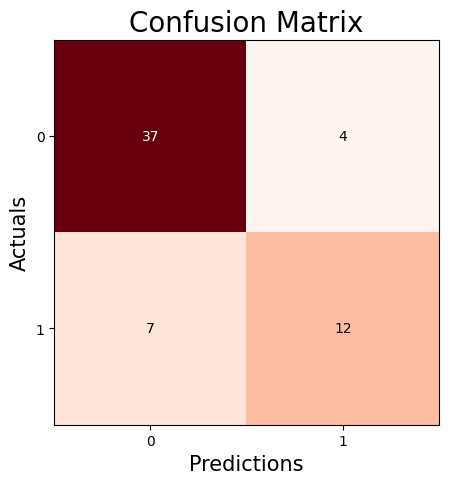

In [40]:
cm = confusion_matrix(y_test, y_pred_ann)
# Plotting a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5), cmap = plt.cm.Reds)
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [41]:
auc = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc)

AUC: 0.767009


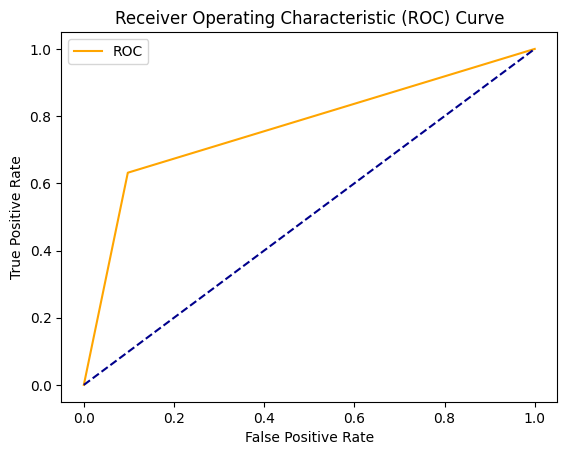

In [42]:
fpr, tpr = roc_curve(y_test, y_pred_ann)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [43]:
model.save('heart_ann_model')

INFO:tensorflow:Assets written to: heart_ann_model\assets


INFO:tensorflow:Assets written to: heart_ann_model\assets
